# Plotting with Pandas

Pandas provides visualization functionality using matplotlib under the hood. We can change default styles of our pandas graphs changing default styles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [4]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


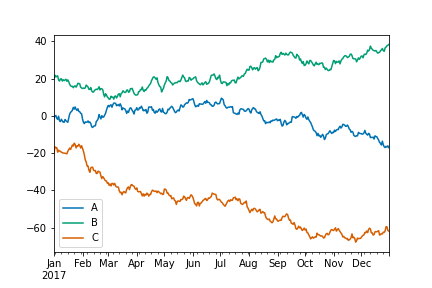

In [5]:
# the plot method on series and dataframe is just a simple wrapper around plt.plot

df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

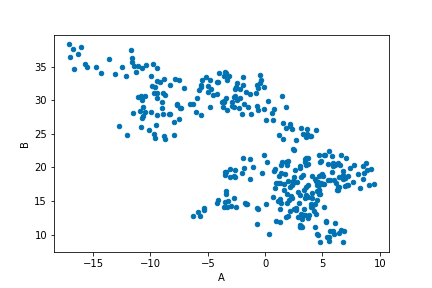

In [6]:
# We can select which plot we want to use by passing it into the 'kind' parameter.
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<AxesSubplot:xlabel='A', ylabel='C'>

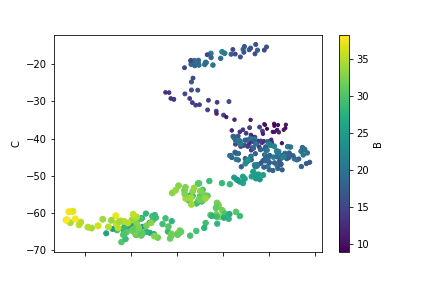

In [7]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

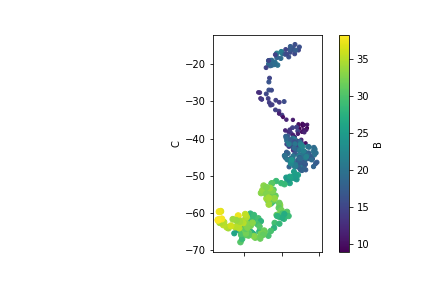

In [8]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

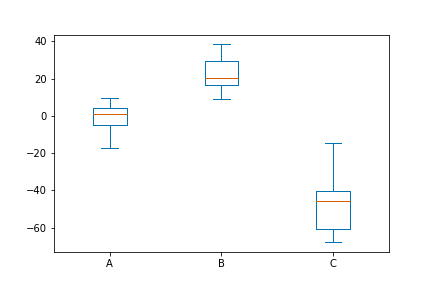

In [9]:
df.plot.box();

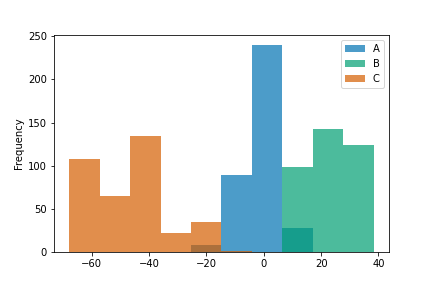

In [10]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample (for visualizing an estimate of a variable's probability density function).  
KDE plots come in handy in data science applications where you want to derive a smooth continuous function from a given sample.

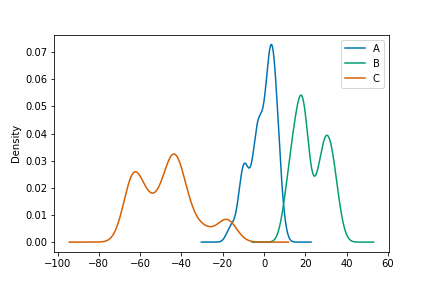

In [11]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [12]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Pandas has a plotting tool that allows us to create a scatter matrix from a DataFrame.  
  
A scatter matrix is a way to comparing each column in a dataframe to every other column in a pairwise fashion.  
  
The scatter matrix creates scatter plots between the different variables and histograms along the diagonals.

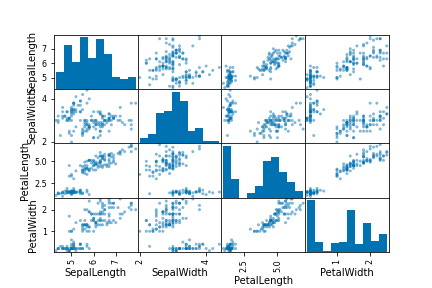

In [13]:
pd.plotting.scatter_matrix(iris);

Parallel coordinate plots are a common way of visualizing high dimensional multivariate data.  
Each variable in the data set corresponds to an equally spaced parallel vertical line. The values of each variable are then connected by lines between for each individual observation.  
Coloring the lines by class, in this example the species of flower, allows the viewer to more easily see any patterns or clustering.


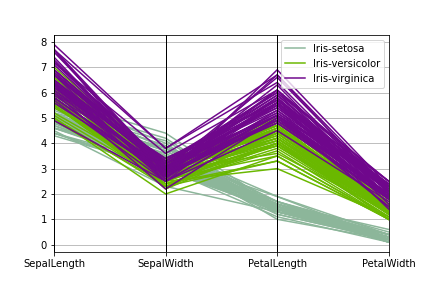

In [14]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

For instance, here we can see that the petal length and petal width are two variables that split the different species fairly clearly.